### MS 263 In-class problems: Feb. 27 2018

#### 1. Uncertainty in surface ocean CO$_2$ calculations

The equation for computing CO$_2$ concentrations from measurements of dissolved inorganic carbon (DIC) and pH is given by

$$ [CO_2]=  \frac{[DIC]}{\left(1+ \frac{K_1'}{H^+}+\frac{K_1'K_2'}{[H^+]^2}\right)} $$

where the dissociation constants that govern the dissociation of CO$_2$ into carbonate and bicarbonate are known from laboratory measurements and are given on a logarithmic scale as $pK'_1 = -\log{K'_1} = $ 5.847 and $pK'_2 = -\log{K'_2} = $ 8.966.

The fugacity (partial pressure, not accounting for non-ideal gas effects) of CO$_2$ can be calculated using

$$ fCO_2 = \frac{[CO_2]}{K_H}$$

where $K_{H,CO_2}$ =  3.24x10$^{-2}$ mol/(kg atm) is Henry's Law constant.

Measurements of DIC have an analytical uncertainty of +/-2 $\mu$mol/kg. Measurements of pH have an analytical uncertainty of +/- 0.0020.

Typical surface values are [DIC] $\approx$ 2000 $\mu$mol/kg and pH $\approx$ 8.1. What is the uncertainty in $fCO_2$ calculated from these values?

In [1]:
from uncertainties import ufloat

DIC = ufloat(2000,2) #μmol/kg
K1 = 10**-5.847 #get it out of log
K2 = 10**-8.966
pH = ufloat(8.1,.0020)
H = 10**-pH #negative log relates H and pH
K_h = .0324

CO2 = DIC/(1+(K1/H)+(K1*K2/(H**2)))

fCO2 = CO2/K_h
print(fCO2,'μmol/kg')


301.9+/-1.6 μmol/kg


#### 2. Harmonic analysis

Fit an annual cycle to a two-year time series of monthly SST data (source: Emery and Thomson).

* Write out the problem as a system of equations, and in matrix form.
* Create a design matrix A - start with a matrix of NaNs, then fill in the columns.
* Use `np.linalg.lstsq` to solve for the coefficients.
* Plot the modeled fit on top of the data.

<IPython.core.display.Javascript object>


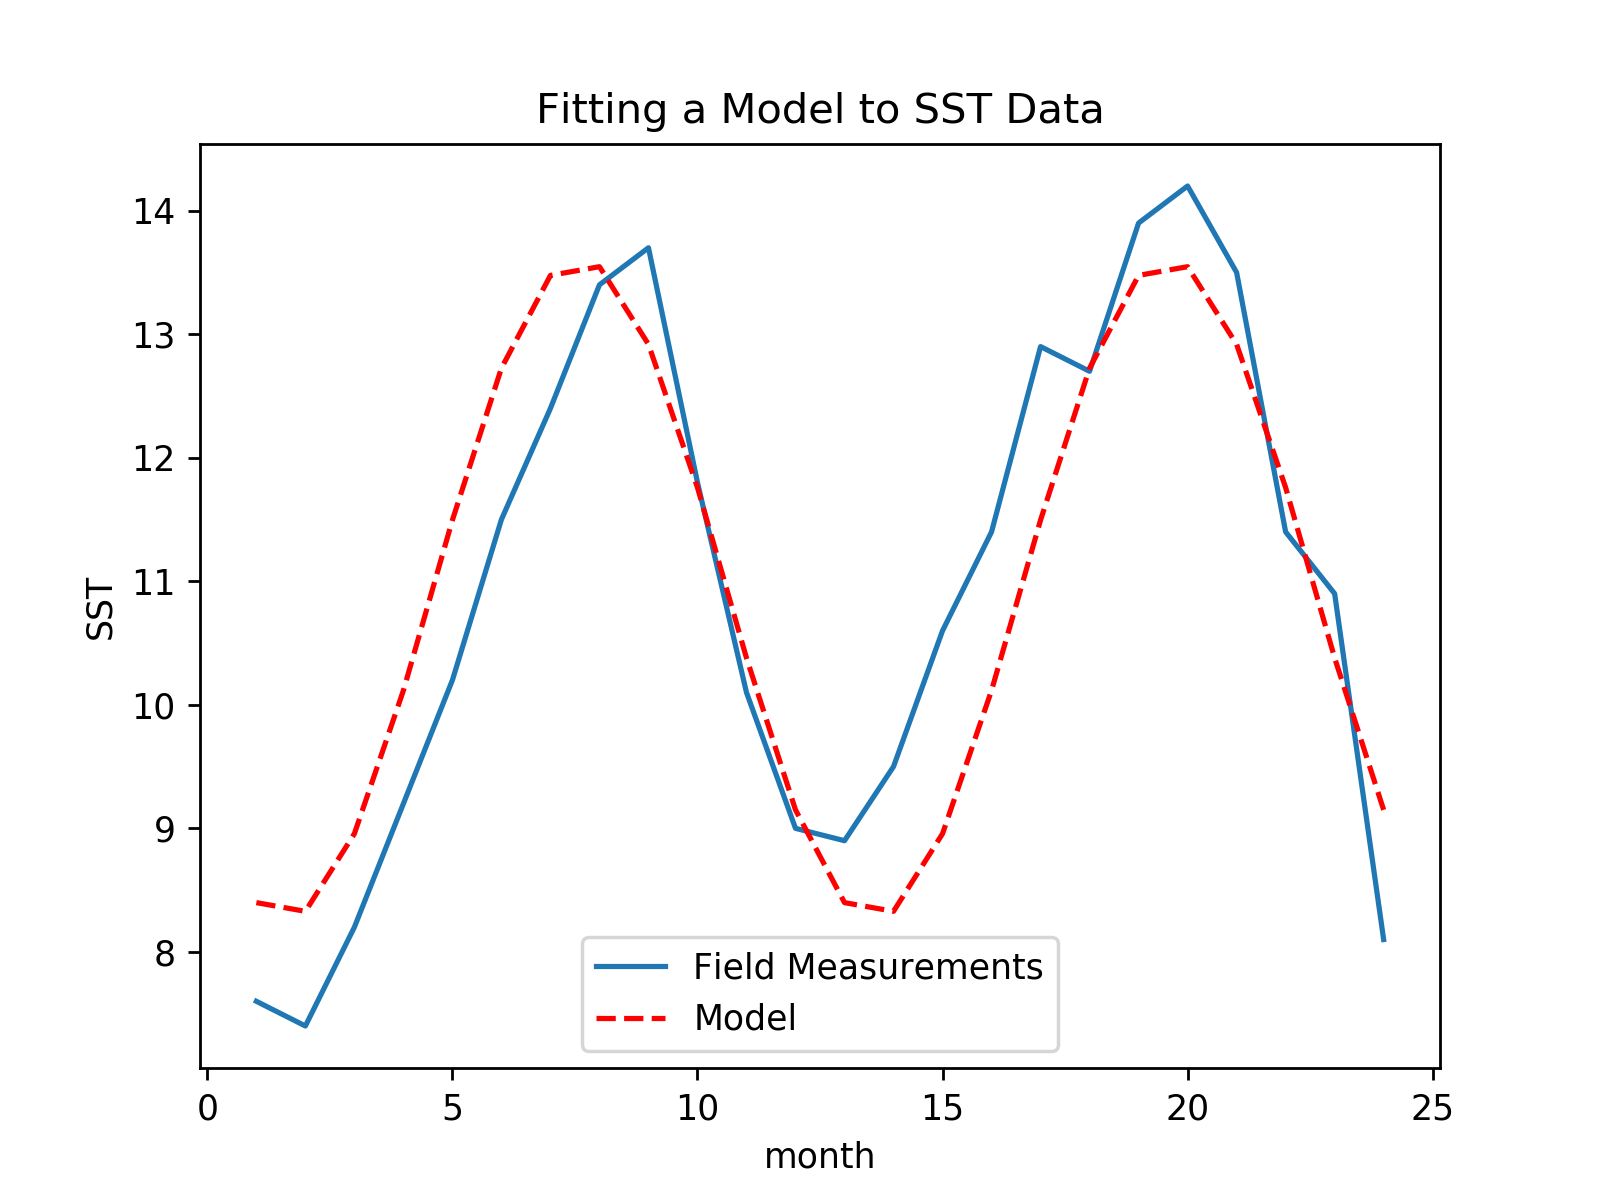

[  8.39872898   8.3281948    8.95682184  10.11617     11.49559286
  12.72547519  13.47627102  13.5468052   12.91817816  11.75883     10.37940714
   9.14952481   8.39872898   8.3281948    8.95682184  10.11617     11.49559286
  12.72547519  13.47627102  13.5468052   12.91817816  11.75883     10.37940714
   9.14952481]


In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook 
#this makes it print the figures real nice like


#create time and SST vectors
t = np.arange(1,25)
SST = np.array([7.6, 7.4, 8.2, 9.2, 10.2, 11.5, 12.4, 13.4, 13.7, 11.8, 10.1, 9.0,
                8.9, 9.5, 10.6, 11.4, 12.9, 12.7, 13.9, 14.2, 13.5, 11.4, 10.9, 8.1])
plt.plot(t,SST,label='Field Measurements')
plt.xlabel('month')
plt.ylabel('SST')
plt.title('Fitting a Model to SST Data')

#Create Design Matrix
A = np.empty([len(SST),3])*np.nan
A[:,0]=1 #make first column 1s
A[:,1] = np.sin((2*np.pi/12)*t) #make second colum sin((2*pi/12)*t)
A[:,2] = np.cos((2*np.pi/12)*t) #make third colum cos((2*pi/12)*t)

#Solve for coefficients
c = np.linalg.lstsq(A,SST)
[c1,c2,c3]=c[0] #get info out of c
stderr = c[1]

yfit = c1 + c2*np.sin((2*np.pi/12)*t) + c3*np.cos((2*np.pi/12)*t)
print(yfit)

plt.plot(t,yfit,'--r',label='Model')
plt.legend()


#### 3. Computing vertical gradients

Using data from one station on the West Coast Ocean Acidification cruise, estimate the vertical gradient of nitrate $\Delta N$/$\Delta z$ at locations throughout the water column. Pressure can be used as the vertical coordinate, $z$.

Use Python to make this calculation two different ways:

1. Using a for loop.
2. Not using a for loop.

Make sure that both calculations work for different profiles that have a different number of samples.

<IPython.core.display.Javascript object>


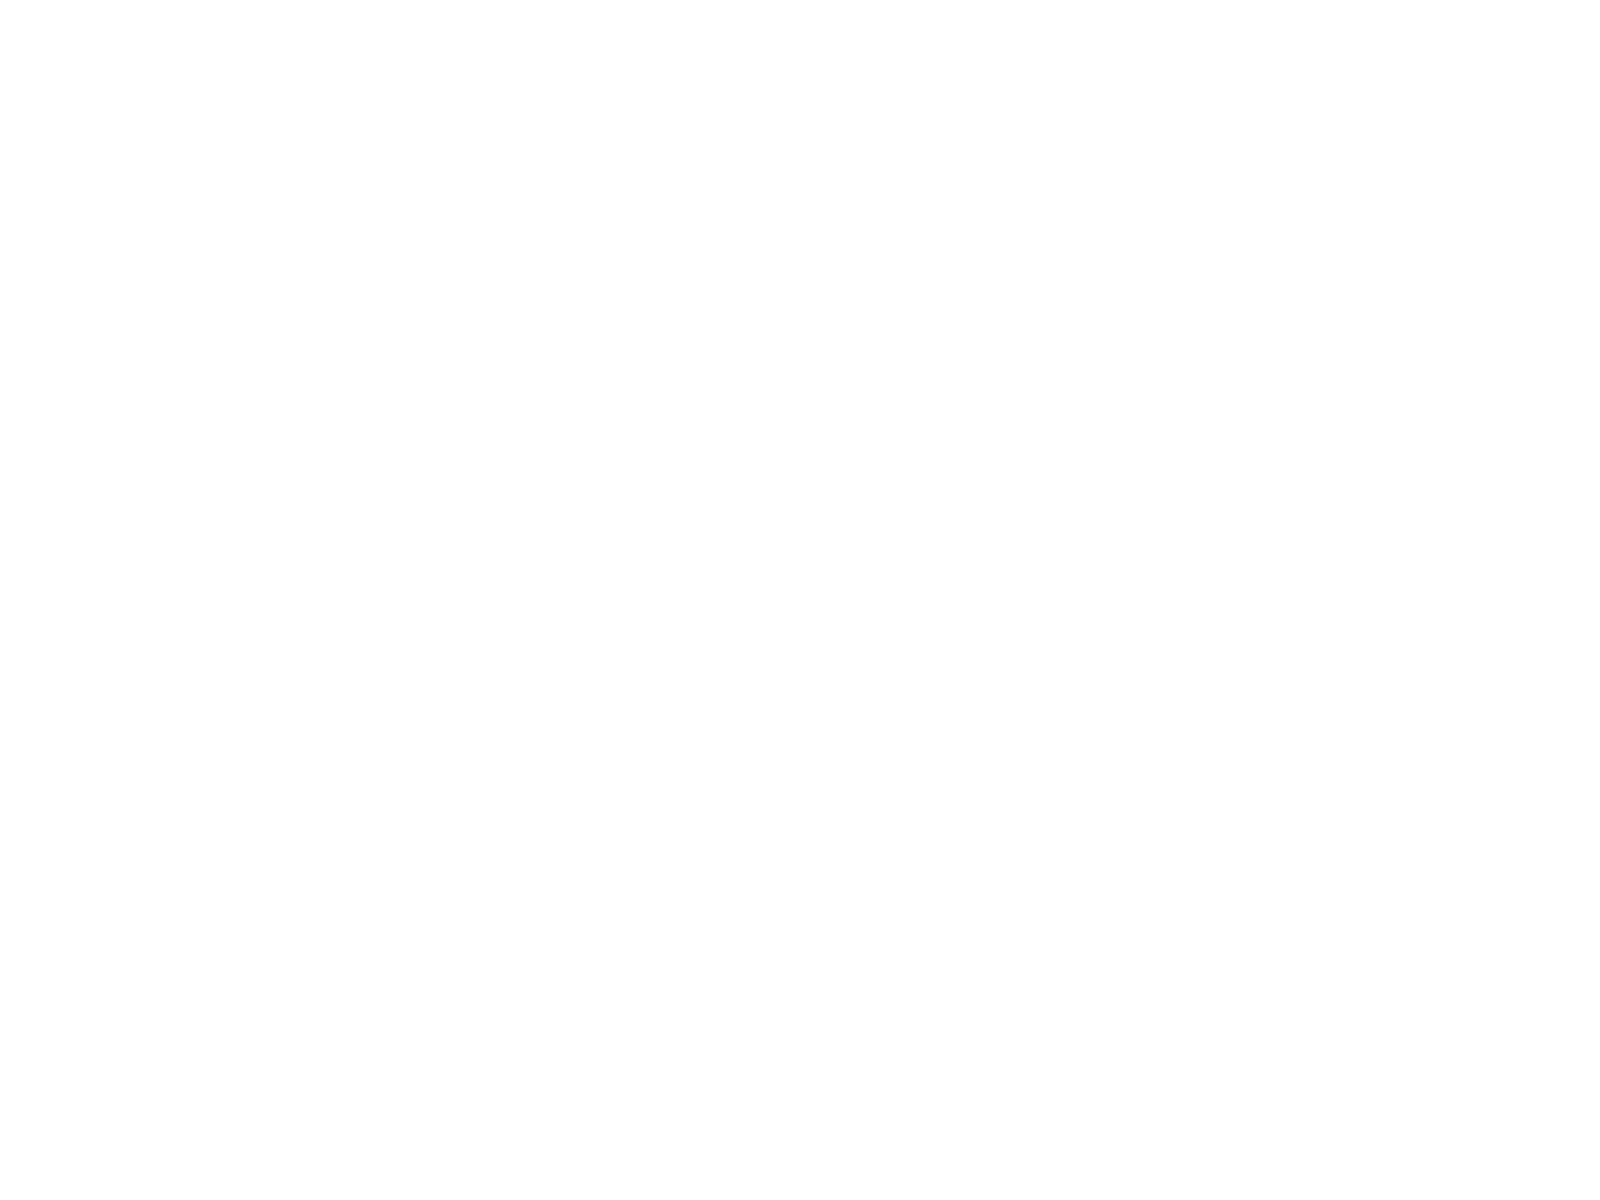

Finding nitrate change with loop:  [ 0.01111111  0.00343554  0.01185682  0.01553398  0.01528472  0.02291457
  0.07616279  0.24464945  0.15346154  0.21156069  0.2203125   0.16160714
  0.21382979  0.50721649  0.26698113  0.0675     -0.          0.00147059
 -0.        ]
Finding nitrate change without loop:  [ 0.01111111  0.00343554  0.01185682  0.01553398  0.01528472  0.02291457
  0.07616279  0.24464945  0.15346154  0.21156069  0.2203125   0.16160714
  0.21382979  0.50721649  0.26698113  0.0675     -0.          0.00147059
 -0.        ]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# you may need to change this, depending on where your data file is
filename = 'WCOA2013_hy1.csv' 
df = pd.read_csv(filename,header=31,na_values=-999,parse_dates=[[8,9]])

# Create a new data frame, using only cast number 12
idx = (df['STNNBR'] == 12)
cast = df.loc[idx]

plt.figure()
plt.plot(cast['NITRAT'],cast['CTDPRS'],'-o',label='Data')
plt.gca().invert_yaxis()
plt.xlabel('Nitrate [$\mu$M]')
plt.ylabel('pressure [dbar]')

nitrate = np.array(cast['NITRAT'])
pressure = np.array(cast['CTDPRS'])

#With loop
nit_change = []
for ii in np.array(range(0,len(nitrate)-1)):
    nit_slope=nitrate[ii+1]-nitrate[ii]
    nit_change = np.append(nit_change,nit_slope)
    
depth_change = []
for jj in np.array(range(0,len(pressure)-1)):
    depth_slope=pressure[jj+1]-pressure[jj]
    depth_change=np.append(depth_change,depth_slope)
    
changeN_d = nit_change/depth_change

print('Finding nitrate change with loop: ', changeN_d)

#Without loop
change = np.diff(nitrate)/np.diff(pressure)
print('Finding nitrate change without loop: ', change)


#### 4. Plot loop

Create a for loop that loops through the following variables, and plots all available data from the WCOA cruise as a function of pressure (use pressure as the vertical coordinate).

<IPython.core.display.Javascript object>


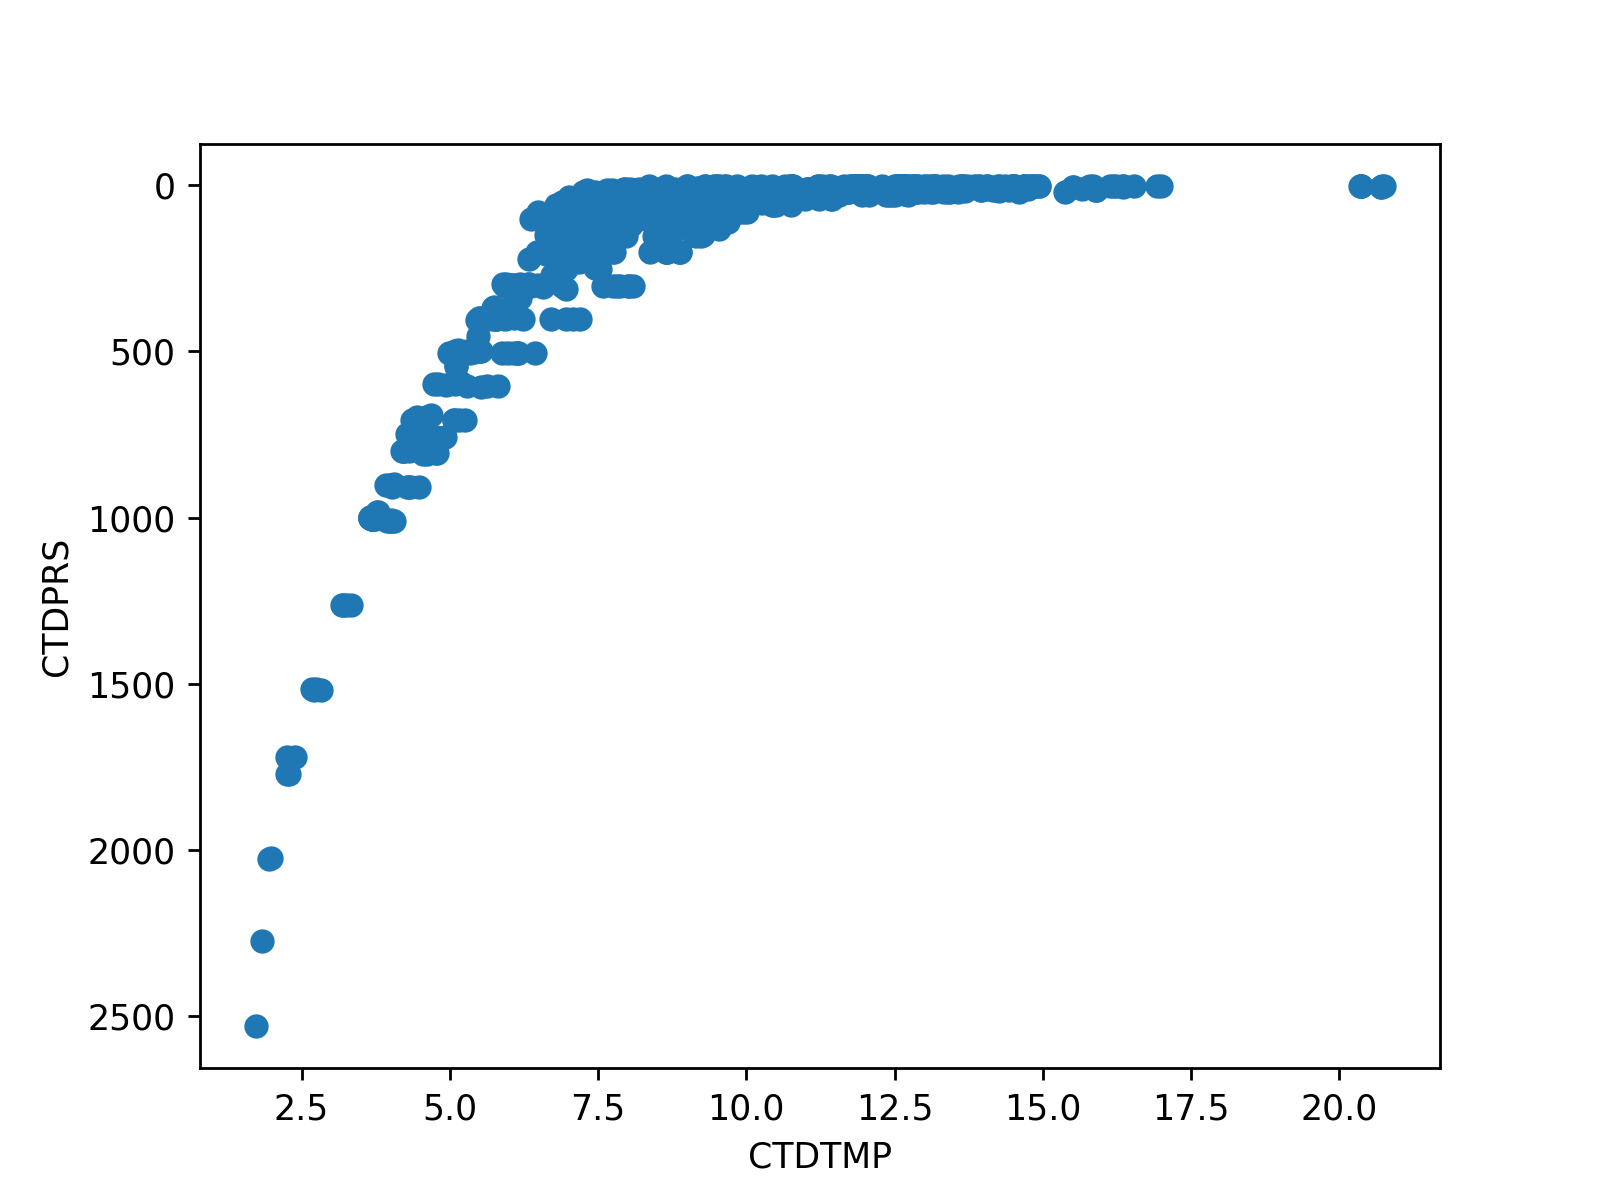

<IPython.core.display.Javascript object>


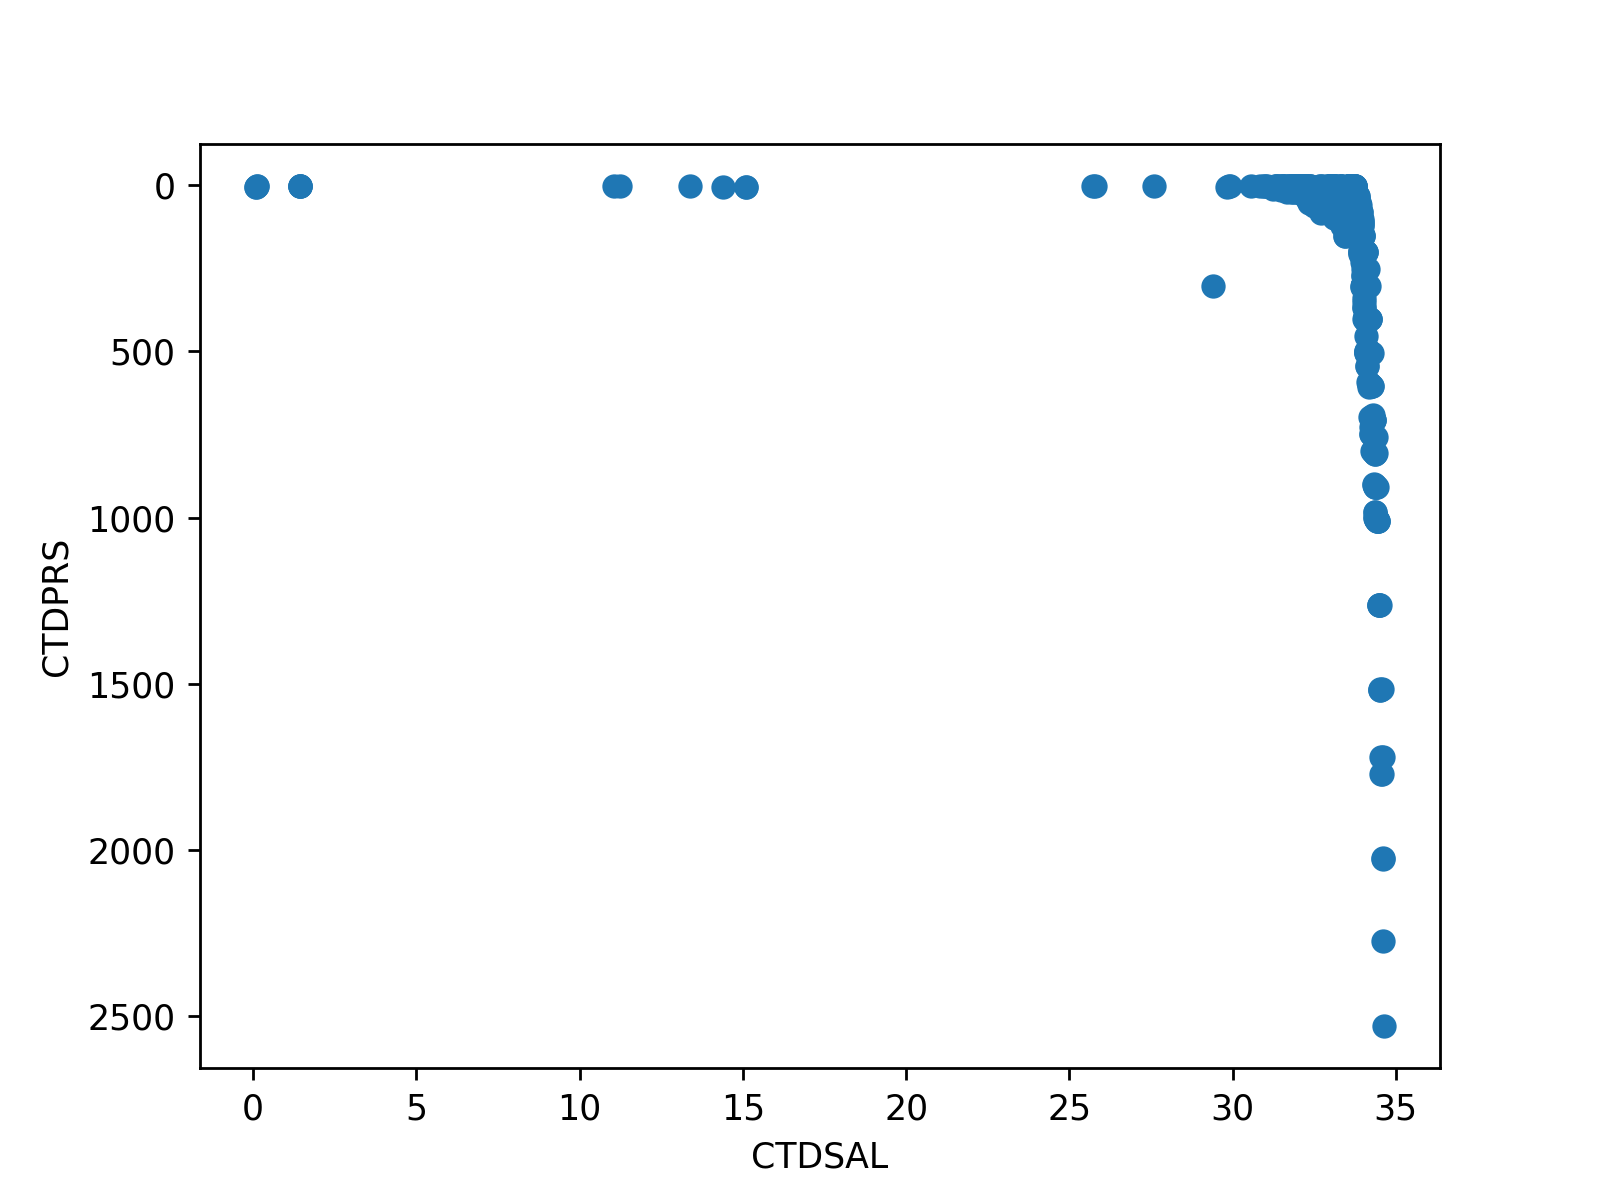

<IPython.core.display.Javascript object>


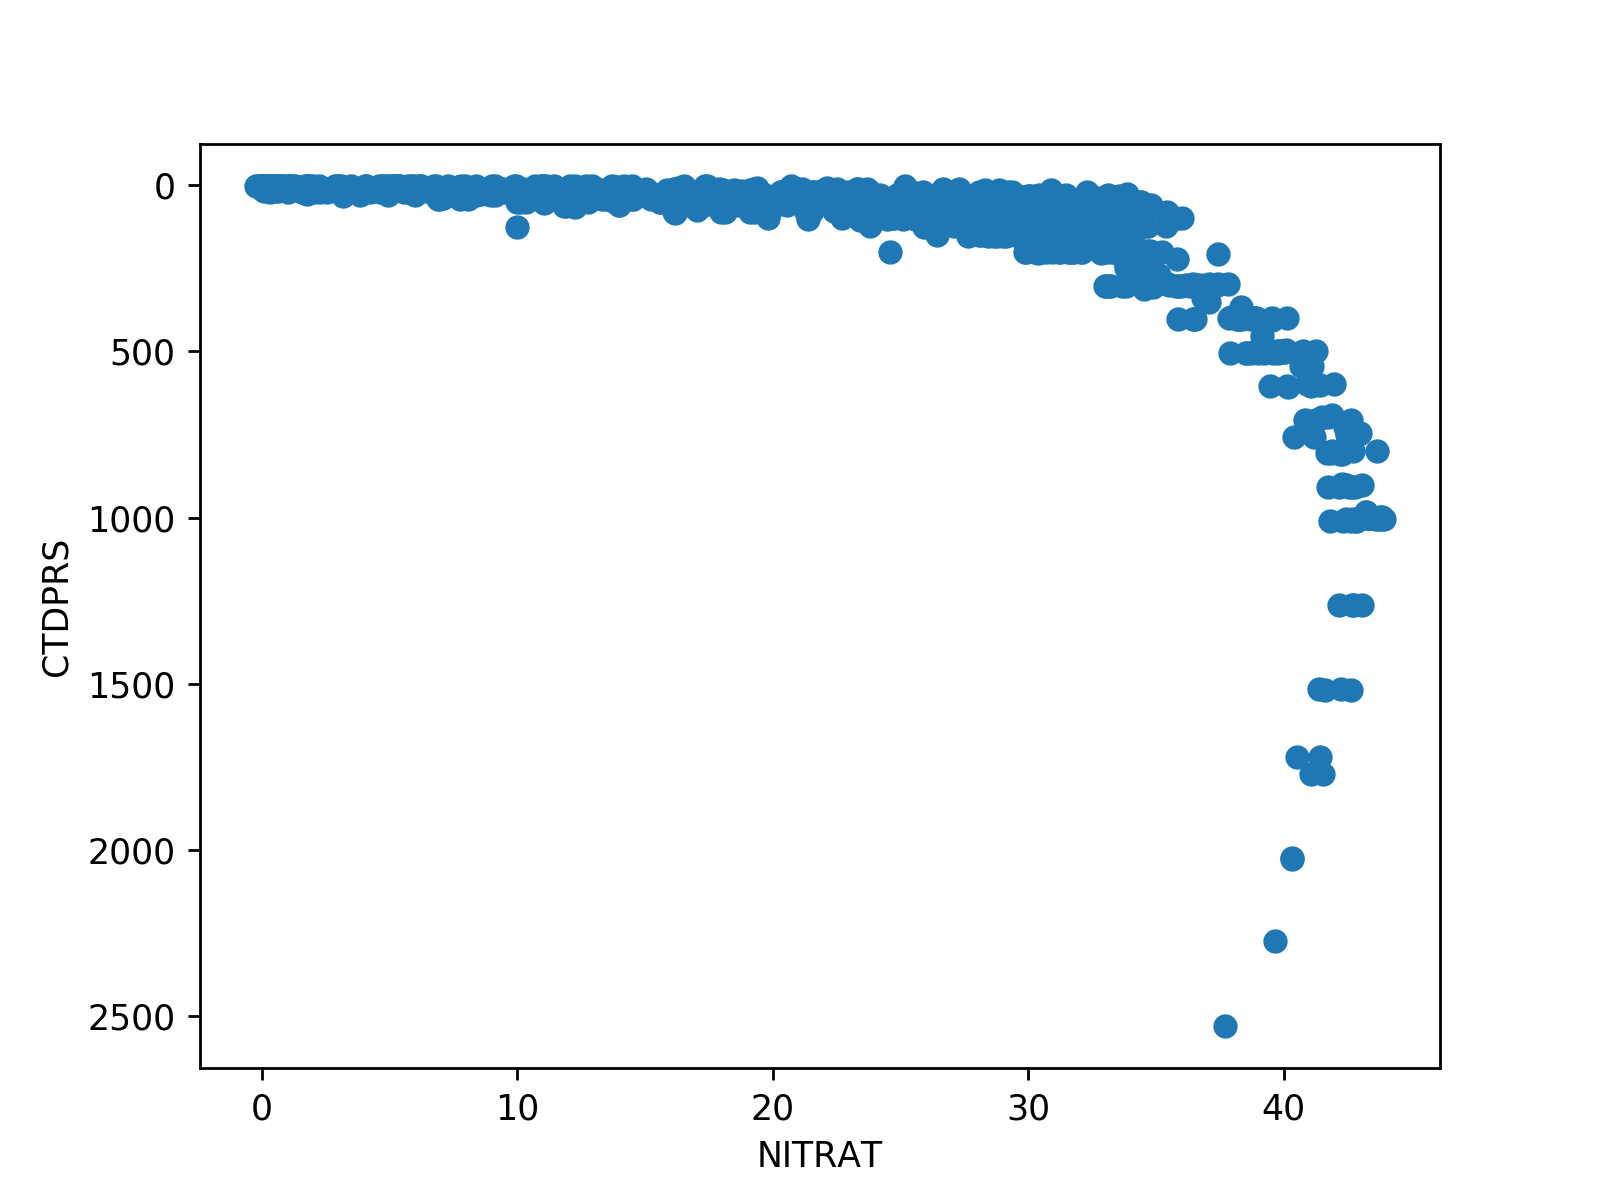

<IPython.core.display.Javascript object>


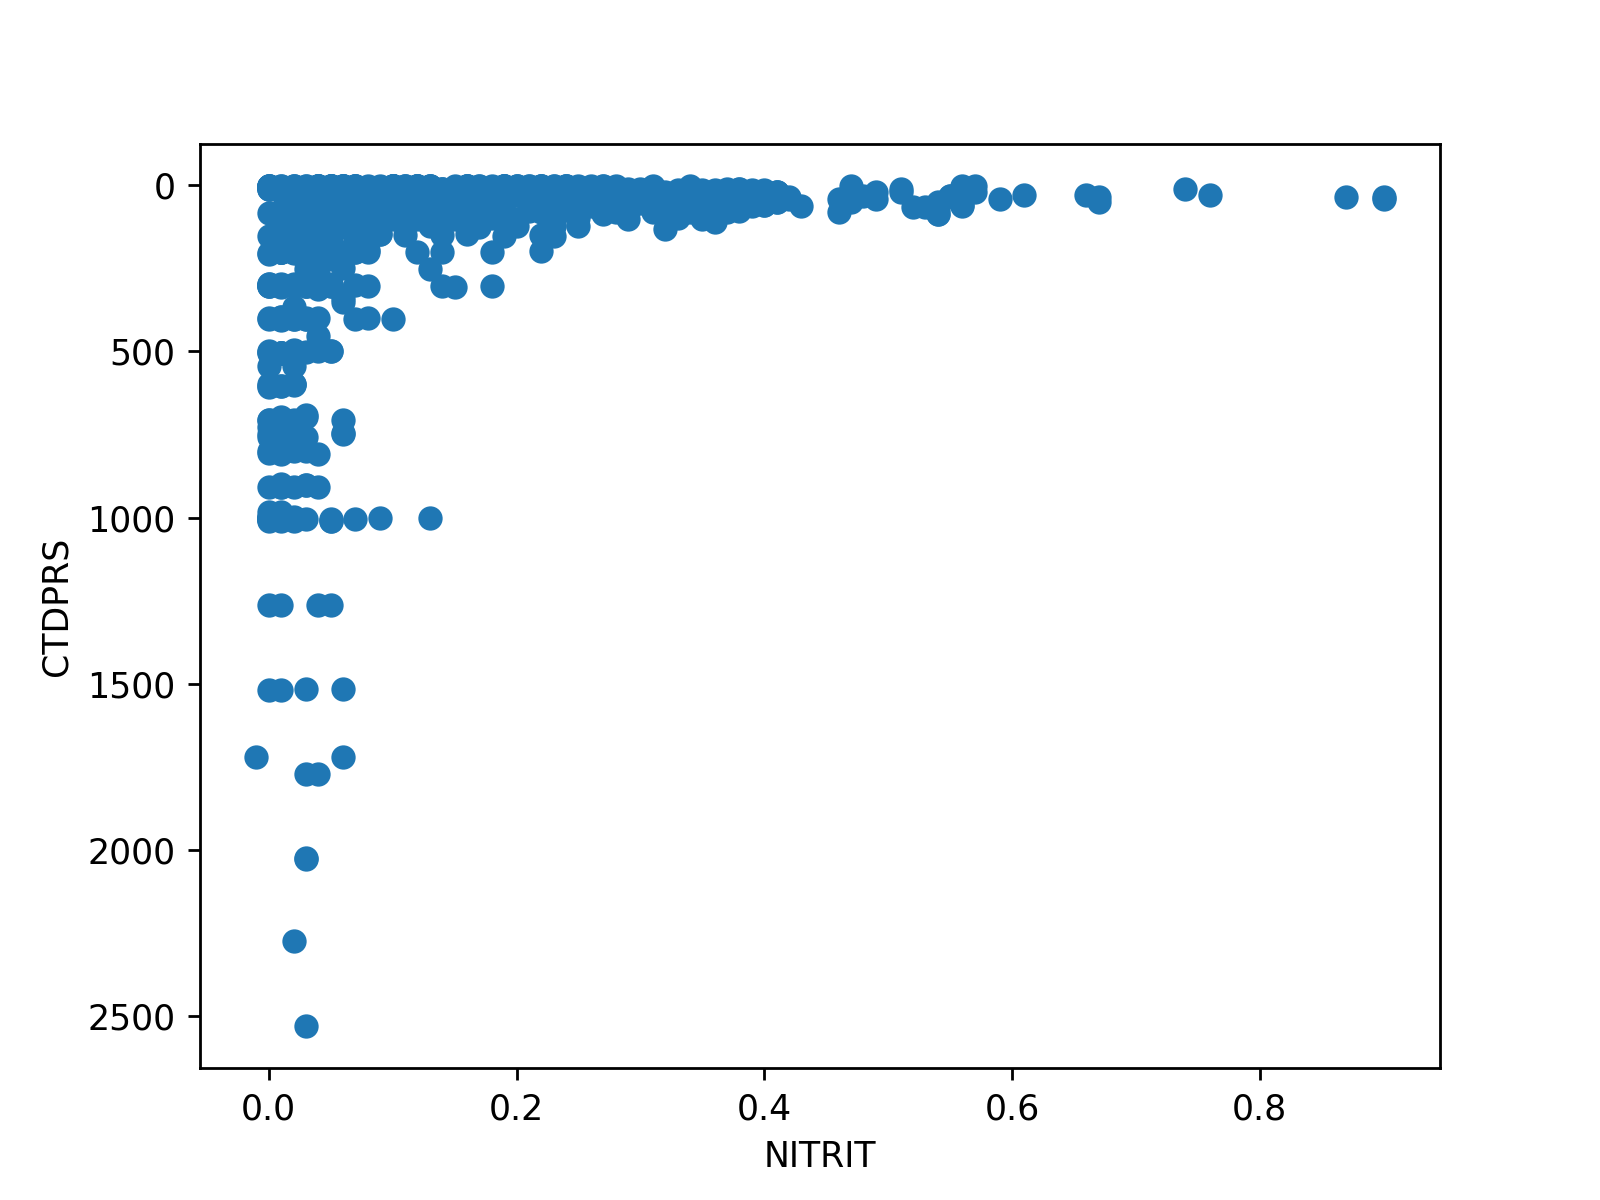

<IPython.core.display.Javascript object>


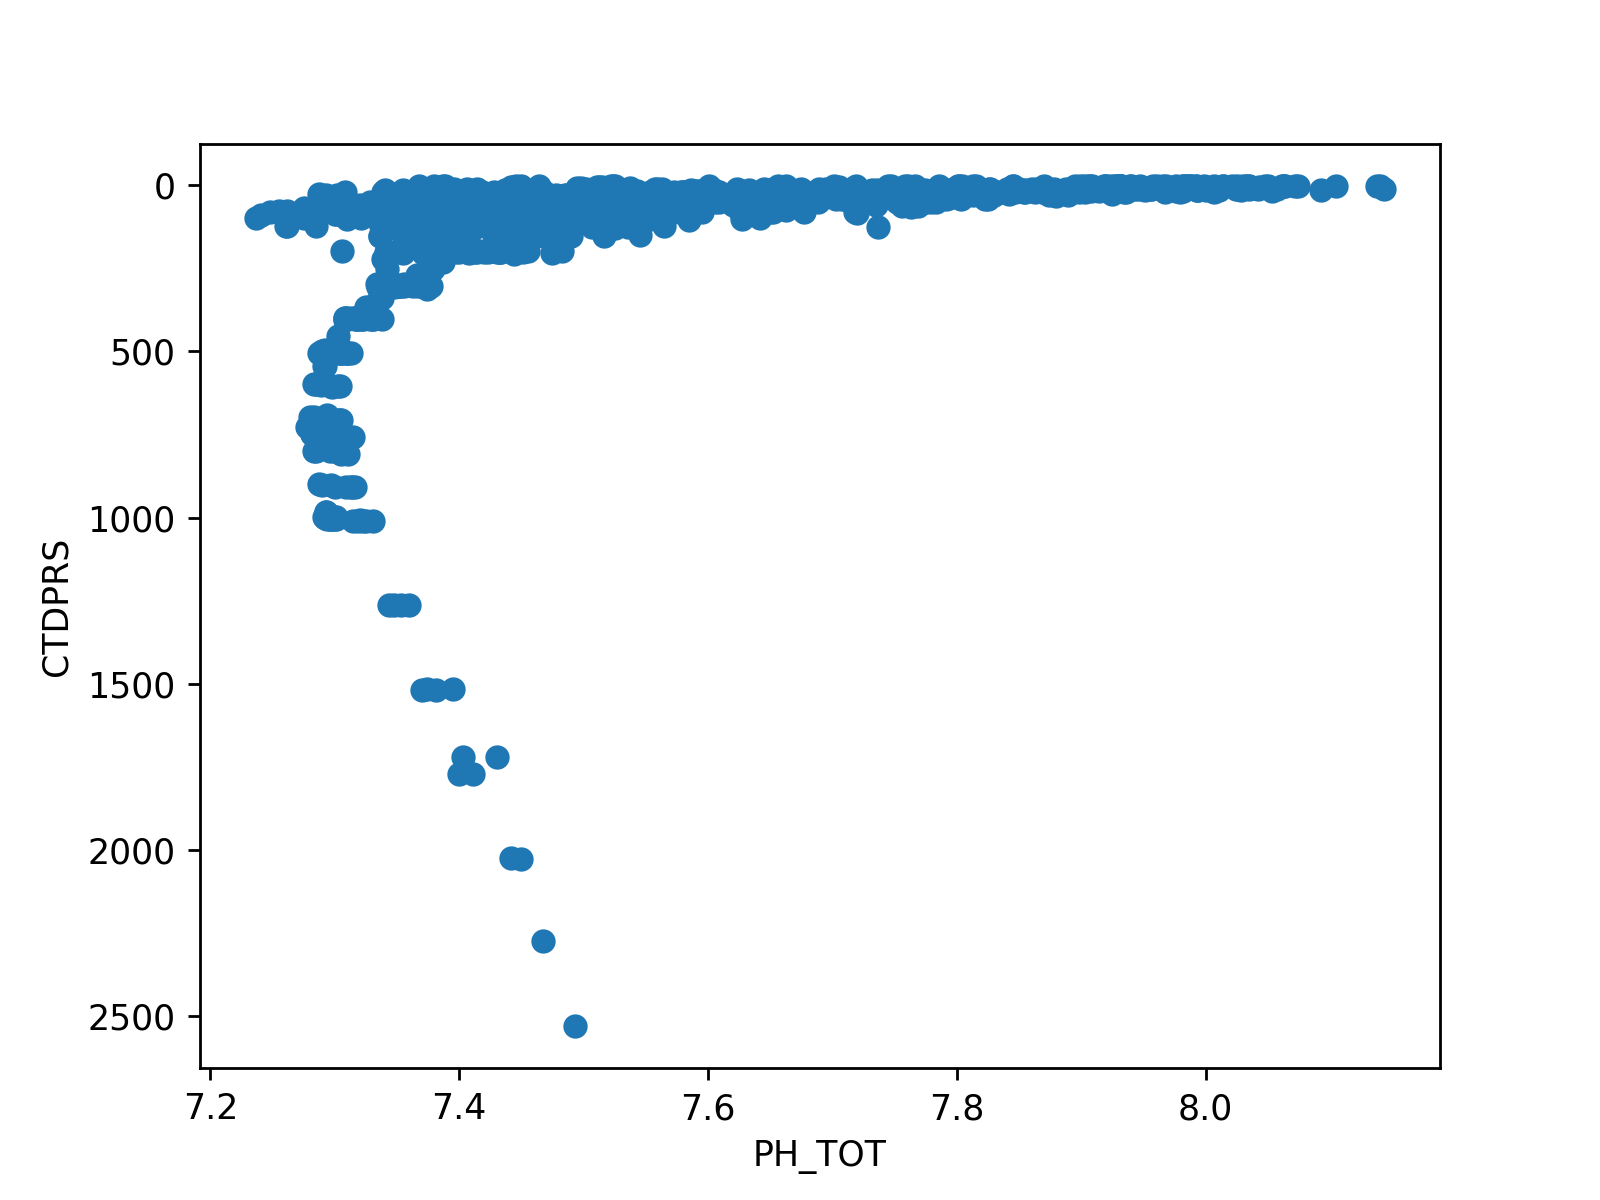

<IPython.core.display.Javascript object>


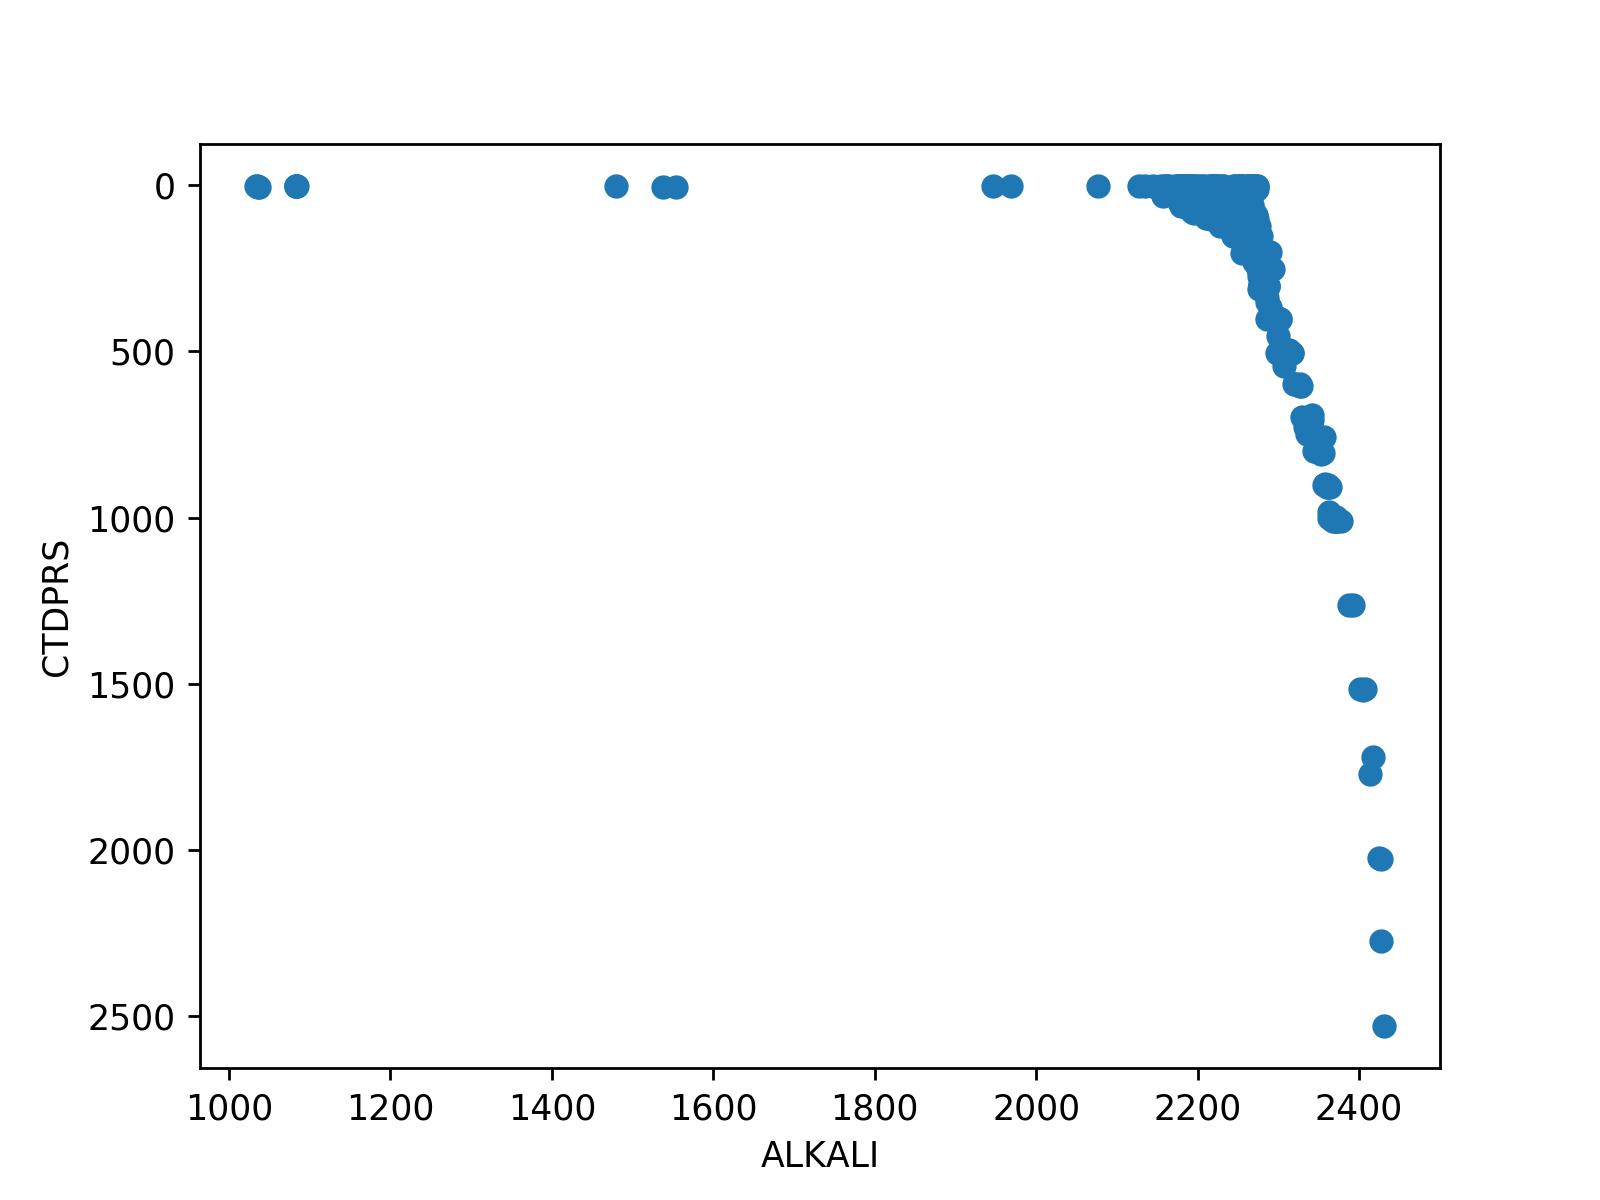

In [5]:
variables_to_plot = ['CTDTMP','CTDSAL','NITRAT','NITRIT','PH_TOT','ALKALI']

for var in variables_to_plot:    
    plt.figure()
    plt.plot(df[var],df['CTDPRS'],'o')
    plt.gca().invert_yaxis()
    plt.xlabel(var)
    plt.ylabel('CTDPRS')
     
    